# Synthetic Data

Basic use case of `stelaro` that manipulates synthetic data.

In [4]:
import os
import json
from stelaro.data import (
    ncbi,
    gtdb,
    Taxonomy,
    synthetic,
    non_similar_sets,
    get_urls,
    make_index_file,
    read_genome
)

DATA_DIRECTORY = "../data/"  # You can modify this directory.
DATASET_DIRECTORY = DATA_DIRECTORY + "genome_small_dataset/"
SUMMARY_DIRECTORY = DATA_DIRECTORY + "ncbi_genome_summaries/"
NCBI_TAXONOMY_DIRECTORY = DATA_DIRECTORY + "ncbi_taxonomy/"
TAXONOMY_DIRECTORY = DATA_DIRECTORY + "gtdb/"
INDEX_FILE = DATASET_DIRECTORY + "index.tsv"

DATASET_V1_DIRECTORY = DATA_DIRECTORY + "version_1/"


def mkdir(path: str) -> None:
    """Create a directory if it does not exist."""
    if not os.path.exists(path):
        os.makedirs(path)


mkdir(DATA_DIRECTORY)

## 1. Fetch Reference Genomes

You can download reference genome summaries and use these summaries to create
your own datasets:

In [8]:
mkdir(SUMMARY_DIRECTORY)
ncbi.install_summaries(SUMMARY_DIRECTORY)

In [9]:
ncbi.summarize_assemblies(SUMMARY_DIRECTORY)

archaea: 2 579 genomes
bacteria: 432 090 genomes
fungi: 644 genomes
invertebrate: 434 genomes
plant: 186 genomes
protozoa: 121 genomes
vertebrate mammalian: 239 genomes
vertebrate other: 432 genomes
viral: 14 997 genomes

Total: 451 722


In [ ]:
ncbi.install_taxonomy(NCBI_TAXONOMY_DIRECTORY)

## 2. Sample Reference Genomes

You can create an index of genomes that will be use to download reference
genomes. Given that the NCBI contains 407929 reference genomes as of November
2024, you may want to sample a subset of genomes to create a more manageable
genome database during tests.

In [ ]:
mkdir(DATASET_DIRECTORY)
ncbi.sample_genomes(SUMMARY_DIRECTORY, INDEX_FILE, fraction = 0.005)

Let's visualize the index file:

In [6]:
with open(INDEX_FILE, "r") as f:
    count = 0
    print("First 5 lines contained in the index file:\n\n```")
    for line in f:
        if count < 5:
            print(line[:-1])
        count += 1
    print(f"```\n\nTotal number of lines: {count}.")

First 5 lines contained in the index file:

```
ID	URL	category
GCF_001639295.1.fna	https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/639/295/GCF_001639295.1_ASM163929v1/GCF_001639295.1_ASM163929v1_genomic.fna.gz	archaea
GCF_902384065.1.fna	https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/902/384/065/GCF_902384065.1_UHGG_MGYG-HGUT-02162/GCF_902384065.1_UHGG_MGYG-HGUT-02162_genomic.fna.gz	archaea
GCF_002214525.1.fna	https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/214/525/GCF_002214525.1_ASM221452v1/GCF_002214525.1_ASM221452v1_genomic.fna.gz	archaea
GCF_003711245.1.fna	https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/003/711/245/GCF_003711245.1_ASM371124v1/GCF_003711245.1_ASM371124v1_genomic.fna.gz	archaea
```

Total number of lines: 1964.


## 3. Install Sampled Reference Genomes

The following cell installs the genomes downloaded at the previous step.

In [7]:
ncbi.install_genomes(INDEX_FILE, DATASET_DIRECTORY)

The genomes listed in the index file should now be installed at ``DATASET_DIRECTORY``. Let's
examine the first file that was downloaded:

In [8]:
with open(INDEX_FILE, "r") as f:
    next(f)
    filename = f.readline().split("\t")[0]

with open(DATASET_DIRECTORY + "/" + filename) as f:
    count = 0
    print("First lines contained in the genome file:\n\n```")
    for line in f:
        if count < 5:
            print(line[:-1])
        count += 1
    print(f"```\n\nTotal number of lines: {count}.")

First lines contained in the genome file:

```
>NZ_LWMV01000001.1 Methanobrevibacter curvatus strain DSM 11111 MBCUR_contig000001, whole genome shotgun sequence
ATCAGTAGAGTGTGCAGAGGTATATAGTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
TTTTTTTTTTTTTATATGTGTATGGTTTTATTCAAGCTTTTCAATAAATTAACAGCAGAATAAGCCGCTAAAACACTTGT
TTTTGGATTTATGTTGGATGGAACATTTTCAGTTTTACTAGTAAAACTTCCAAATTCTCCTTTTACATGGACTTCATGAA
TATTTCTATTTATTTCTGGATCTATAATGATTTTTACATTAATATCCATATTAGAAGCAATACTTAGTGCAGCTGCAACA
```

Total number of lines: 30529.


## 4. Generate a Synthetic Metagenome From Reference Genomes

The following cell extracts subsequences from the downloaded reference genomes to simulate reads
obtained during a metagenomic sequencing experiment.

In [ ]:
from stelaro.data import synthetic_metagenome

SYNTHETIC_FILE = DATA_DIRECTORY + "test_metagenome1.fasta"

synthetic_metagenome(
    INDEX_FILE,
    DATASET_DIRECTORY,
    SYNTHETIC_FILE,
    reads = 3,
    length = 50,
)

with open(SYNTHETIC_FILE, "r") as f:
    for line in f:
        print(line[:-1])  # Ignore the newline character.

>GCF_001998405.1.fna	341684	0
ACGAGCAACGCTGAAGCGAAAATAGGGGGGATCACCCCGCTTAAATTCAA

>GCF_002498065.1.fna	1444400	1
CAAGCATATCGGGATGGGTCGTCGCGGGGAACGGGTCGTCGCTGTTGAAG

>GCF_038731385.1.fna	1390023	2
AGAGAGAAAAAGATAGATAACGTTCACATACCCAGAAAGCCCCTCGATGT



## 5. Install a Reference Taxonomy

A taxonomy describes the phylogenetic links between species.

The GTDB project (https://gtdb.ecogenomic.org/) is a genome taxonomy database that describes a
taxonomy for bacteria and archaea. Install it with the following cell:

In [4]:
gtdb.install_taxonomy(TAXONOMY_DIRECTORY)

Let's inspect the **bacterial** taxonomy:

In [5]:
with open(TAXONOMY_DIRECTORY + "/bac120_taxonomy.tsv") as f:
    count = 0
    print("First lines contained in the GTDB bacterial taxonomy file:\n\n```")
    for line in f:
        if count < 5:
            print(line[:-1])
        count += 1
    print(f"```\n\nTotal number of lines: {count}.")

First lines contained in the GTDB bacterial taxonomy file:

```
RS_GCF_009898805.1	d__Bacteria;p__Pseudomonadota;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia coli
RS_GCF_024700115.1	d__Bacteria;p__Pseudomonadota;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia coli
RS_GCF_003829795.1	d__Bacteria;p__Pseudomonadota;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia coli
RS_GCF_900480365.1	d__Bacteria;p__Pseudomonadota;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia coli
GB_GCA_003592305.1	d__Bacteria;p__Pseudomonadota;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia coli
```

Total number of lines: 715230.


The first column is the identifier of a reference genome. The second column is its taxonomy. Each
field of that column contains a prefix that indicates the taxonomic order:

- `d__`: Domain (bacteria)
- `p__`: Phylum
- `c__`: Class
- `o__`: Order
- `f__`: Family
- `g__`: Genus
- `s__`: Species

There are multiple *Escherichia coli* reference genomes because they correspond to different strains
within the same species.

Visualizing the full taxonomy is complicated because it comprises more than *700 000* reference
genomes, only for bacteria! The following cell loads the GTDB bacteria taxonomy and selects only
reference genomes comprised within the `refseq` database, which contains curated data. The cell then
prints a table that summarizes the taxonomic groups in the phylum Pseudomonadota and the number
of reference genomes for each family.

In [2]:
T = Taxonomy(("refseq", ))
urls = get_urls(SUMMARY_DIRECTORY)
T.read_GTDB_file(TAXONOMY_DIRECTORY + "/bac120_taxonomy.tsv", urls)
T.read_GTDB_file(TAXONOMY_DIRECTORY + "/ar53_taxonomy.tsv", urls)
del urls
T.print(
    ("Bacteria", ),  # This is the path that selects a subgraph in the taxonomy (i.e. excludes archaea).
    2,  # The number of taxonomic levels to present in the table within the selected taxon.
    100  # The width of the table in terms of number of characters.
)

Taxonomy within the domain Bacteria (372_073 genomes):
+==========================================+==========================================+===========+
| phylum (50)                              | class (136)                              | N Genomes |
+==========================================+==========================================+===========+
| Thermosulfidibacterota (1)                                                           |           |
|                                            Thermosulfidibacteria (1)                 | 1         |
+------------------------------------------+------------------------------------------+-----------+
| Omnitrophota (1)                                                                     |           |
|                                            Koll11 (1)                                | 1         |
+------------------------------------------+------------------------------------------+-----------+
| Babelota (1)                           

## 6. Prepare Data for Training

The raw dataset has flaws.

- Some taxonomic groups comprise very few reference genomes. For instance, the Bacteria phylum
  Thermosulfidibacterota comprises a single reference genome.
- The dataset is unbalanced. For instance, the class Gammaproteobacteria comprises $181 293$
  reference genomes.
- All genomes are stored in a graph, which makes them unsuitable to train and test a
  machine learning model.

The following cells address these flaws by to obtain reference genomes grouped by a taxonomic
level and split in distinct sets.

In [3]:
# Filter the dataset.
dataset = T.bin_genomes(
    depth=2,  # The dataset will have a resolution at the level of phyla.
    granularity_level=1,  # Data points will be split by genus.
    min_granularity=10,  # The minimum number of genus by data point.
    n_min_reference_genomes_per_bin=50,  # Minimum number of reference genomes by genus.
    n_max_reference_genomes_per_species=3,  # Maximum number of reference genomes for a species.
    max_bin_size=20,  # Maximum number of reference genomes by genus.
    n_max_bins=50  # Maximum number of data points for each phylum.
)

Taxon ['root', 'Archaea', 'Nanohalarchaeota'] not retained; 3 genus in ('refseq',).
Taxon ['root', 'Archaea', 'Nanobdellota'] not retained; 1 genus in ('refseq',).
Taxon ['root', 'Archaea', 'Asgardarchaeota'] not retained; 2 genus in ('refseq',).
Taxon ['root', 'Archaea', 'Korarchaeota'] not retained; 2 genus in ('refseq',).
Taxon ['root', 'Archaea', 'Hadarchaeota'] not retained; 1 genus in ('refseq',).
Taxon ['root', 'Archaea', 'Methanobacteriota_B'] not retained; 5 genus in ('refseq',).
Taxon ['root', 'Archaea', 'Micrarchaeota'] not retained; 2 genus in ('refseq',).
Taxon ['root', 'Archaea', 'Thermoplasmatota'] not retained (48 genomes).
Taxon ['root', 'Bacteria', 'Thermosulfidibacterota'] not retained; 1 genus in ('refseq',).
Taxon ['root', 'Bacteria', 'Omnitrophota'] not retained; 1 genus in ('refseq',).
Taxon ['root', 'Bacteria', 'Babelota'] not retained; 2 genus in ('refseq',).
Taxon ['root', 'Bacteria', 'Tectomicrobia'] not retained; 1 genus in ('refseq',).
Taxon ['root', 'Bacte

Phyla that contain too few genera (less than 10) are dropped, so we end up with 24 phyla.

The GTDB project does not include viruses, so we have to use the taxonomy of the NCBI instead, which
is based on the ICTV. The taxonomic levels are organized differently, so we split the virus
reference genomes by realm instead of phylum and use a genus-level granularity.

In [ ]:
tax_id_to_genome = ncbi.get_assembly_taxid(SUMMARY_DIRECTORY + "viral.txt")
parents, ranks = ncbi.get_all_taxonomy_parents(
    NCBI_TAXONOMY_DIRECTORY + "nodes.dmp",
    set(tax_id_to_genome.keys())
)
names = ncbi.taxid_to_names(NCBI_TAXONOMY_DIRECTORY + "names.dmp", set(parents.keys()))
lineages = ncbi.resolve_taxonomy(parents, ranks, tax_id_to_genome, names)
virus_dataset = ncbi.bin_genomes(
    lineages,
    ("acellular root", "realm"),
    "genus",
    tax_id_to_genome,
    max_bin_size=20,  # Maximum number of reference genomes by genus.
    n_min_bins=10,  # Minimum number of genus for each realm.
    n_max_bins=100  # Maximum number of genus for each realm.
)

Taxon 1288359 has no known lineage.
Taxon 1452540 has no known lineage.
Taxon 2020881 has no known lineage.
Taxon 2746248 has no known lineage.
Taxon 2755000 has no known lineage.
Out of 14496 reconstructed taxonomies, retained 11774.
`('Viruses', 'Duplodnaviria')` contains 1438 values, reducing.
`('Viruses', 'Riboviria')` contains 1059 values, reducing.
`('Viruses', 'Monodnaviria')` contains 256 values, reducing.
Retained 1379 reference genomes to balance the dataset.


Virus reference genomes are significantly smaller than archaea and bacteria genomes, so the bins
are bigger to compensate.

```
Why go through this hassle?
```

To correctly evaluate the performance of classification models, we have to separate the reference
genomes into distinct sets. We cannot train and evaluate them on the same reference genomes or on
reference genomes that are very similar because that would contaminate the model and give a false
impression of its actual performance.

For instance, if the training and testing sets both have reference genomes of *Escherichia coli*,
the evaluation does not actually measure the precision of the model because the two sets comprise
essentially the same data. So we split reference genomes based on their *genus* to ensure that the
sets are non-similar. You can control that level (e.g. use the family or species as the
non-similarity cutoff point) with the parameter `granularity_level`.

Let's write this dataset in a JSON file:

In [ ]:
mkdir(DATASET_V1_DIRECTORY)
GENOME_V1_DATASET_FILE = DATASET_V1_DIRECTORY + "version_1.json"
with open(GENOME_V1_DATASET_FILE, 'w') as f:
    json.dump(dataset + virus_dataset, f, indent=4)

The file is organized as follows:

```
[
    [
        [Taxonomic description of a phylum / realm],
        [
            [
                <genus name>,
                [
                    <list of reference genomes in that genus>
                ]
            ],
            ...
        ],
        ...
    ]
]
```

Let's list the download URLs of all these reference genomes in a file and
download them:

In [ ]:
# Convert the dataset into a list of URLs that can be downloaded.
INDEX_FILE = DATASET_V1_DIRECTORY + "index.tsv"
with open(GENOME_V1_DATASET_FILE, "r") as f:
    dataset = json.load(f)
make_index_file(dataset, INDEX_FILE, SUMMARY_DIRECTORY)

In [ ]:
# Download all listed reference genomes as FASTA files.
genome_dir_v1 = DATASET_V1_DIRECTORY + "genomes"
mkdir(genome_dir_v1)
ncbi.install_genomes(INDEX_FILE, genome_dir_v1)

The dataset can then be split into train, validation, and test splits.

In [12]:
from random import shuffle

train, validate, test = [], [], []
for label, bins in dataset:
    elements = bins.copy()
    shuffle(elements)
    n = len(elements)
    tenth = int(n * 0.1)
    validate.append([label, elements[:tenth]])
    test.append([label, elements[tenth:tenth * 2]])
    train.append([label, elements[tenth * 2:]])

SPLIT_DIRECTORY = DATASET_V1_DIRECTORY + "/splits"
mkdir(SPLIT_DIRECTORY)
with open(SPLIT_DIRECTORY + "/train.json", "w") as f:
    json.dump(train, f, indent=4)
with open(SPLIT_DIRECTORY + "/validate.json", "w") as f:
    json.dump(validate, f, indent=4)
with open(SPLIT_DIRECTORY + "/test.json", "w") as f:
    json.dump(test, f, indent=4)

We can now generate synthetic reads for each dataset. In the following cell, `x` stands for
synthetic reads (i.e. sequences of nucleotides) and `y` stands for taxonomic labels (i.e. the phylum
or realm from which the reads were generated).

In [29]:
index_to_taxonomic_label = {}  # Map `y` values to taxonomic labels.
for i, (label, _) in enumerate(dataset):
    index_to_taxonomic_label[i] = label
with open(SPLIT_DIRECTORY + "/map.json", "w") as f:
    json.dump(index_to_taxonomic_label, f, indent=4)

In [3]:
import json
from stelaro.data import synthetic

LENGTH = 1000
N_READS_PER_GENOME = 20
with open("../datasets/version_1_splits/map.json", "r") as f:
    index_to_taxonomic_label = json.load(f)

for dataset_name in ("validate", "test", "train"):
    with open(f"../datasets/version_1_splits/{dataset_name}.json", "r") as f:
        dataset = json.load(f)
    index_to_n_passes = {}
    for i in index_to_taxonomic_label:
        index_to_n_passes[i] = N_READS_PER_GENOME
    n = synthetic.write(
        dataset,
        index_to_taxonomic_label,
        index_to_n_passes,
        "../data/version_1/genomes/",
        LENGTH,
        f"../data/version_1/static/{dataset_name}/"
    )
    print(f"Sampled {n} genomes.")


Estimated file size: 12.56 MB.
Average number of reads per bin: 433.10


  6%|▌         | 746/12560 [00:01<00:24, 482.77it/s] 

Error on GCF_020804205.1: 'Y'


 81%|████████  | 10193/12560 [00:29<00:02, 1090.32it/s]

Error on GCF_000927375.1: 'M'


 89%|████████▊ | 11118/12560 [00:30<00:00, 1475.74it/s]

Error on GCF_000893795.1: 'R'


 94%|█████████▎| 11761/12560 [00:30<00:00, 1840.91it/s]

Error on GCF_002817435.1: Reads are too short.
Error on GCF_000886675.1: 'Y'


 98%|█████████▊| 12249/12560 [00:31<00:00, 1947.39it/s]

Error on GCF_013087075.1: 'R'


100%|██████████| 12560/12560 [00:31<00:00, 403.29it/s] 


Sampled 12560 genomes.
Estimated file size: 11.6 MB.
Average number of reads per bin: 400.00


 77%|███████▋  | 8921/11600 [00:29<00:18, 144.60it/s]

Error on GCF_001854725.1: 'Y'


 89%|████████▉ | 10321/11600 [00:35<00:03, 409.25it/s]

Error on GCF_002827685.1: Reads are too short.


 95%|█████████▌| 11021/11600 [00:36<00:00, 848.81it/s]

Error on GCF_001926075.1: 'Y'


100%|█████████▉| 11561/11600 [00:36<00:00, 1064.66it/s]

Error on GCF_001440955.1: 'R'
Error on GCF_018594965.1: Reads are too short.


100%|██████████| 11600/11600 [00:36<00:00, 314.87it/s] 


Sampled 11600 genomes.
Estimated file size: 93.28 MB.
Average number of reads per bin: 3216.55


 31%|███       | 28461/93280 [01:25<03:14, 333.78it/s]

Error on GCF_002251945.1: 'W'


 37%|███▋      | 34703/93280 [01:40<01:43, 566.57it/s]

Error on GCF_001729865.1: 'M'


 38%|███▊      | 35041/93280 [01:41<01:43, 561.98it/s]

Error on GCF_000253035.1: 'Y'


 43%|████▎     | 40421/93280 [01:56<02:24, 365.89it/s]

Error on GCF_010470665.1: 'Y'


 77%|███████▋  | 71481/93280 [03:15<00:39, 546.62it/s]

Error on GCF_002826605.1: Reads are too short.


 77%|███████▋  | 72021/93280 [03:16<00:19, 1092.36it/s]

Error on GCF_002818035.1: Reads are too short.
Error on GCF_000911915.1: 'R'


 78%|███████▊  | 72340/93280 [03:16<00:20, 1025.82it/s]

Error on GCF_002829285.1: Reads are too short.


 78%|███████▊  | 73221/93280 [03:18<00:32, 614.93it/s] 

Error on GCF_000843685.1: 'W'
Error on GCF_002829305.1: Reads are too short.
Error on GCF_002924545.1: 'M'


 79%|███████▉  | 73541/93280 [03:18<00:27, 729.63it/s]

Error on GCF_002827725.1: Reads are too short.
Error on GCF_002827625.1: Reads are too short.
Error on GCF_002833805.1: Reads are too short.


 80%|███████▉  | 74161/93280 [03:19<00:24, 767.08it/s]

Error on GCF_000889015.1: 'R'


 80%|████████  | 74645/93280 [03:19<00:20, 916.33it/s] 

Error on GCF_013088515.1: Reads are too short.


 81%|████████  | 75311/93280 [03:20<00:16, 1113.19it/s]

Error on GCF_002355065.1: 'Y'
Error on GCF_002833605.1: Reads are too short.


 82%|████████▏ | 76887/93280 [03:22<00:15, 1053.99it/s]

Error on GCF_000882935.1: 'K'


 83%|████████▎ | 77701/93280 [03:22<00:08, 1764.73it/s]

Error on GCF_006384835.1: 'K'
Error on GCF_002605485.1: 'M'


 84%|████████▍ | 78195/93280 [03:23<00:11, 1299.04it/s]

Error on GCF_000955415.1: 'M'


 85%|████████▍ | 79133/93280 [03:23<00:10, 1329.43it/s]

Error on GCF_008952025.1: 'S'


 87%|████████▋ | 80981/93280 [03:24<00:06, 1889.18it/s]

Error on GCF_002817775.1: Reads are too short.
Error on GCF_002988035.1: Reads are too short.
Error on GCF_002830645.1: Reads are too short.
Error on GCF_002830625.1: Reads are too short.
Error on GCF_002830585.1: Reads are too short.


 88%|████████▊ | 81819/93280 [03:25<00:05, 2189.49it/s]

Error on GCF_000896195.1: 'D'


 89%|████████▊ | 82701/93280 [03:25<00:04, 2345.25it/s]

Error on GCF_000922215.1: 'K'


 89%|████████▉ | 83442/93280 [03:26<00:04, 2099.30it/s]

Error on GCF_002867285.1: 'Y'


 91%|█████████ | 84593/93280 [03:26<00:02, 2926.40it/s]

Error on GCF_003028975.1: 'Y'
Error on GCF_001755345.1: 'M'
Error on GCF_001755105.1: 'Y'
Error on GCF_001754205.1: 'Y'


 92%|█████████▏| 85421/93280 [03:26<00:03, 2145.79it/s]

Error on GCF_000868165.1: 'Y'
Error on GCF_001934645.1: 'Y'


 92%|█████████▏| 86240/93280 [03:27<00:03, 1990.95it/s]

Error on GCF_001961355.1: 'W'
Error on GCF_002889215.1: 'M'


 93%|█████████▎| 87052/93280 [03:27<00:02, 2221.38it/s]

Error on GCF_002829985.1: Reads are too short.
Error on GCF_000845065.1: 'Y'


 94%|█████████▍| 87801/93280 [03:27<00:02, 2297.08it/s]

Error on GCF_000896735.1: 'R'
Error on GCF_000902595.1: 'M'
Error on GCF_002994705.1: Reads are too short.
Error on GCF_018591415.1: Reads are too short.
Error on GCF_000844665.1: Reads are too short.
Error on GCF_000840045.1: Reads are too short.
Error on GCF_000884215.1: Reads are too short.
Error on GCF_000914235.1: Reads are too short.
Error on GCF_002987335.1: Reads are too short.
Error on GCF_000915955.1: Reads are too short.
Error on GCF_018591435.1: Reads are too short.
Error on GCF_000914275.1: Reads are too short.
Error on GCF_004117295.1: Reads are too short.
Error on GCF_018591425.1: Reads are too short.


 96%|█████████▌| 89148/93280 [03:28<00:01, 2785.95it/s]

Error on GCF_002957465.1: 'R'
Error on GCF_001957695.1: 'K'
Error on GCF_002825705.1: 'K'


 97%|█████████▋| 90094/93280 [03:28<00:01, 2782.77it/s]

Error on GCF_000910155.1: 'R'
Error on GCF_000847305.1: Reads are too short.


 97%|█████████▋| 90655/93280 [03:28<00:00, 2771.72it/s]

Error on GCF_002867695.1: Reads are too short.
Error on GCF_000872625.1: Reads are too short.


 98%|█████████▊| 91598/93280 [03:29<00:00, 2344.10it/s]

Error on GCF_029886025.1: 'Y'


 99%|█████████▉| 92421/93280 [03:29<00:00, 2483.66it/s]

Error on GCF_000863725.1: 'R'
Error on GCF_000896155.1: 'W'
Error on GCF_029883525.1: 'R'
Error on GCF_000911415.1: 'K'
Error on GCF_029885855.1: 'Y'


100%|██████████| 93280/93280 [03:29<00:00, 444.26it/s] 


Sampled 93280 genomes.


## 7. Train a Neural Network for Classification

This section uses synthetic metagenomes to train a neural network to classify reads as belonging to
viral or bacterial genomes.

In [1]:
from stelaro import models
from torch.utils.data import DataLoader
import json

BATCH_SIZE = 256
train_data = DataLoader(
    models.SyntheticReadDataset("../data/version_1/static/train/"),
    batch_size=BATCH_SIZE,
    shuffle=True
)
validate_data = DataLoader(
    models.SyntheticReadDataset("../data/version_1/static/validate/"),
    batch_size=BATCH_SIZE,
    shuffle=True
)
test_data = DataLoader(
    models.SyntheticReadDataset("../data/version_1/static/test/"),
    batch_size=BATCH_SIZE,
    shuffle=True
)

with open("../data/version_1/static/train/map.json", "r") as f:
    mapping = json.load(f)

In [2]:
from torch.nn import CrossEntropyLoss
from torch.optim import Adam
from torch import half
from stelaro.models import feedforward

LENGTH = 1000
model = feedforward.CNN_1(LENGTH, len(mapping)).to("cuda")
criterion = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)
losses, f1 = models.train(
    model,
    train_data,
    validate_data,
    criterion,
    optimizer,
    max_n_epochs=20,
    patience=3,
    device="cuda",
    mapping=mapping
)

100%|██████████| 365/365 [00:10<00:00, 35.54it/s]


1/20 Loss: 974.00. F1:  ['0.093084', '0.4767']  . Patience: 3


100%|██████████| 365/365 [00:10<00:00, 36.09it/s]


2/20 Loss: 748.42. F1:  ['0.16653', '0.54738']  . Patience: 3


100%|██████████| 365/365 [00:10<00:00, 36.05it/s]


3/20 Loss: 561.59. F1:  ['0.17517', '0.54514']  . Patience: 3


100%|██████████| 365/365 [00:09<00:00, 36.54it/s]


4/20 Loss: 362.33. F1:  ['0.16428', '0.53903']  . Patience: 3


100%|██████████| 365/365 [00:10<00:00, 35.57it/s]


5/20 Loss: 179.98. F1:  ['0.15428', '0.52002']  . Patience: 2


100%|██████████| 365/365 [00:10<00:00, 35.75it/s]


6/20 Loss: 62.83. F1:  ['0.16338', '0.54111']  . Patience: 1


100%|██████████| 365/365 [00:10<00:00, 35.54it/s]


7/20 Loss: 18.05. F1:  ['0.15539', '0.53681']  . Patience: 0
Stopping early.


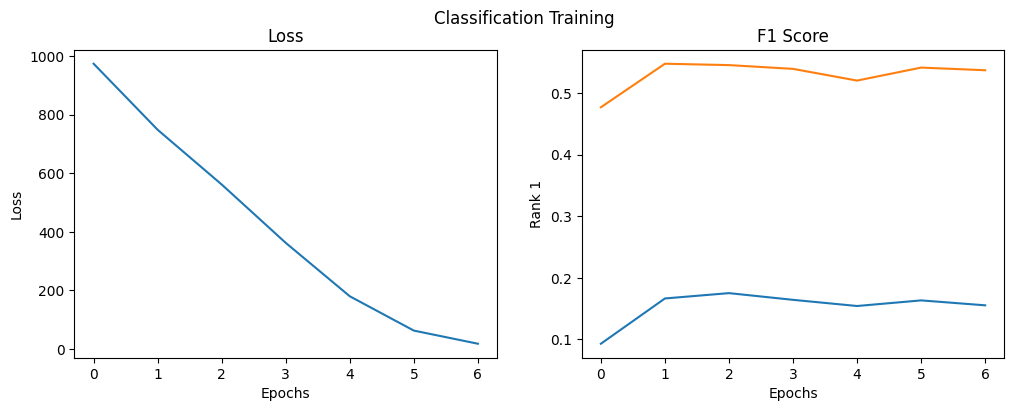

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x = list(range(len(losses)))
ax[0].plot(x, losses, label="losses")
ax[0].set(xlabel='Epochs', ylabel='Loss')
ax[0].set_title("Loss")
for r, f in enumerate(f1):
    ax[1].plot(x, f, label="f1")
    ax[1].set(xlabel='Epochs', ylabel=f'Rank {r}')
    ax[1].set_title("F1 Score")
fig.suptitle("Classification Training")
plt.show()

In [2]:
from torch.nn import CrossEntropyLoss
from torch.optim import Adam
from torch import half
from stelaro.models import feedforward

LENGTH = 1000
model = feedforward.CNN_2(LENGTH, len(mapping)).to("cuda")
criterion = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)
losses, f1 = models.train(
    model,
    train_data,
    validate_data,
    criterion,
    optimizer,
    max_n_epochs=10,
    patience=5,
    device="cuda",
    mapping=mapping
)

100%|██████████| 1458/1458 [00:43<00:00, 33.35it/s]


1/10 Loss: 3841.87. F1: 0.07442


100%|██████████| 1458/1458 [00:44<00:00, 32.97it/s]


2/10 Loss: 3141.81. F1: 0.14898


100%|██████████| 1458/1458 [00:44<00:00, 33.02it/s]


3/10 Loss: 2332.72. F1: 0.15825


100%|██████████| 1458/1458 [00:43<00:00, 33.28it/s]


4/10 Loss: 1015.76. F1: 0.14943


100%|██████████| 1458/1458 [00:43<00:00, 33.36it/s]


5/10 Loss: 181.80. F1: 0.14352


100%|██████████| 1458/1458 [00:43<00:00, 33.27it/s]


6/10 Loss: 85.28. F1: 0.14532


100%|██████████| 1458/1458 [00:43<00:00, 33.24it/s]


7/10 Loss: 79.32. F1: 0.14550


100%|██████████| 1458/1458 [00:43<00:00, 33.18it/s]


8/10 Loss: 80.81. F1: 0.13500


100%|██████████| 1458/1458 [00:44<00:00, 33.06it/s]


9/10 Loss: 77.92. F1: 0.14038


100%|██████████| 1458/1458 [00:45<00:00, 32.32it/s]


10/10 Loss: 69.71. F1: 0.13756


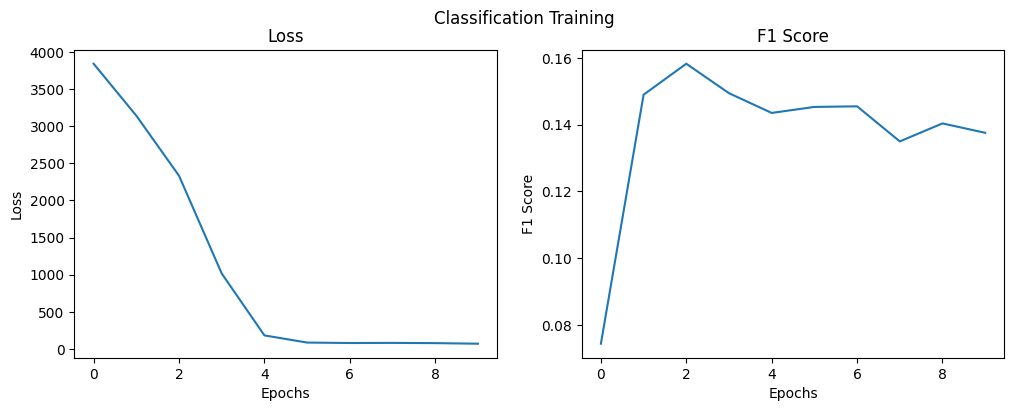

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x = list(range(len(losses)))
ax[0].plot(x, losses, label="losses")
ax[0].set(xlabel='Epochs', ylabel='Loss')
ax[0].set_title("Loss")
ax[1].plot(x, f1, label="f1")
ax[1].set(xlabel='Epochs', ylabel='F1 Score')
ax[1].set_title("F1 Score")
fig.suptitle("Classification Training")
plt.show()

- courbes distinctes pour entrainement et validation
- entrainer jusquà la dégradation / plateau des résultats de validation
- comparer les modèles (CNN / RNN / MLP / ... / RF (méthodes classiques)) et les résultats
- limiter les bases de données  / nombre de citations / facilité d'utilisation du format de données